In [ ]:
import pandas as pd
df = pd.read_csv('/content/PCOS_data.csv')
df=df.drop(['Sl. No', 'Patient File No.','Unnamed: 44'], axis=1)
#info showed some object datatype So converting them to numeric
df["AMH(ng/mL)"] = pd.to_numeric(df["AMH(ng/mL)"], errors='coerce')
df["II    beta-HCG(mIU/mL)"] = pd.to_numeric(df["II    beta-HCG(mIU/mL)"], errors='coerce') 
df.dropna()
df['Marraige Status (Yrs)'].fillna(df['Marraige Status (Yrs)'].median(),inplace=True)
df['II    beta-HCG(mIU/mL)'].fillna(df['II    beta-HCG(mIU/mL)'].median(),inplace=True)
df['AMH(ng/mL)'].fillna(df['AMH(ng/mL)'].median(),inplace=True)
df['Fast food (Y/N)'].fillna(df['Fast food (Y/N)'].median(),inplace=True)
df.reset_index(inplace=True,drop=True)
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler()
scaling.fit_transform(df[['BMI','II    beta-HCG(mIU/mL)','FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH',
       'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'AMH(ng/mL)', 'PRL(ng/mL)','RBS(mg/dl)','BP _Systolic (mmHg)']])
scaling.fit_transform(df[[' Age (yrs)', 'Weight (Kg)','Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)']])

X=df.drop(['PCOS (Y/N)'], axis=1)
y=df['PCOS (Y/N)']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=40) 
rf.fit(X_train, y_train) 

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear',multi_class='ovr') 
lr.fit(X_train, y_train)
lr.score(X_test, y_test) 

from sklearn.svm import SVC
svm = SVC(C=10)  #regularisation
svm.fit(X_train, y_train)
svm.score(X_test, y_test) 

0.6871165644171779

In [ ]:
pred_prob1 = rf.predict_proba(X_test)
pred_prob2 = lr.predict_proba(X_test)
#pred_prob3 = svm.predict_proba(X_test)

from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
#fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [ ]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)

0.9479166666666666 0.9452030812324929


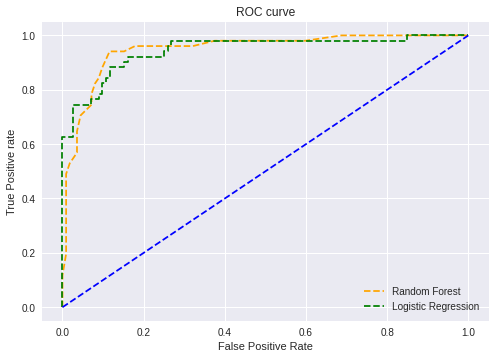

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Random Forest')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();